In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data


In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Effect of Outliers (Exercise 5)

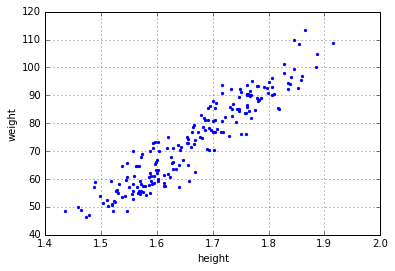

In [3]:
plt.figure()
plt.scatter(height, weight, marker=".", color='b', s=20)
plt.xlabel("height")
plt.ylabel("weight")
plt.grid()
plt.show()

In [4]:
def compute_cost(y, tx, w):
    """calculate the cost.

    you can calculate the cost by mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    
    # raise NotImplementedError    
    
    e = y - np.dot(tx, w)
    N = len(y)
    
    L = 1/(2*N)*np.dot(np.transpose(e),e)
    return L 

# TEST
w = [1, 2]
cost = compute_cost(y, tx, w)
print("The cost is %s"%cost)

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    # raise NotImplementedError
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            loss[i,j] = compute_cost(y, tx, [w0[i], w1[j]])
    
    return loss

The cost is 2729.18854223


Grid Search: loss*=14.405193928041571, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.076 seconds


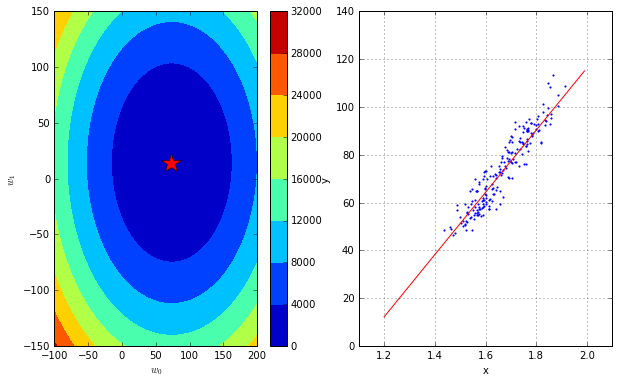

In [5]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot_sub")  # Optional saving

## Now, we add the outliers in the new data


In [6]:
import datetime
from helpers import *

height_outlier, weight_outlier, gender_outlier = load_data(sub_sample=True, add_outlier=True)
x_outlier, mean_x_outlier, std_x_outlier = standardize(height_outlier)
y_outlier, tx_outlier = build_model_data(x_outlier, weight_outlier)

Grid Search: loss*=66.92119404701603, w0*=72.72727272727272, w1*=10.606060606060595, execution time=0.051 seconds


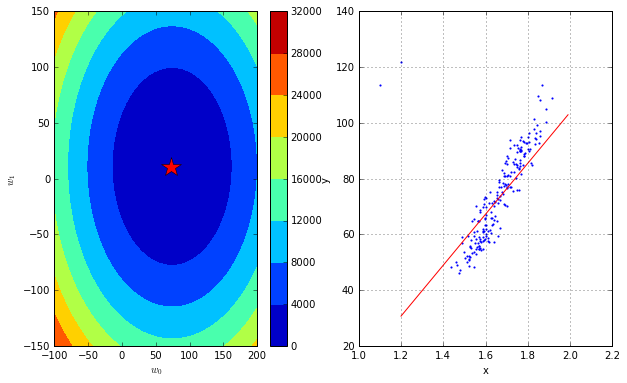

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y_outlier, tx_outlier, grid_w0, grid_w1)

# Select the best combinaison
loss_star_outlier, w0_star_outlier, w1_star_outlier = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star_outlier, w0=w0_star_outlier, w1=w1_star_outlier, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x_outlier, std_x_outlier, height_outlier, weight_outlier)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot_sub_outliers")  # Optional saving

In [8]:
# Print the results
print("Grid Search without outliers: loss*={l}, w0*={w0}, w1*={w1}".format(
      l=loss_star, w0=w0_star, w1=w1_star))

# Print the results
print("Grid Search with outliers: loss*={l}, w0*={w0}, w1*={w1}".format(
      l=loss_star_outlier, w0=w0_star_outlier, w1=w1_star_outlier))


Grid Search without outliers: loss*=14.405193928041571, w0*=72.72727272727272, w1*=13.636363636363626
Grid Search with outliers: loss*=66.92119404701603, w0*=72.72727272727272, w1*=10.606060606060595


# Exercise 6: MAE

In [9]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    # raise NotImplementedError
    
    e = y - np.dot(tx, w)
    N = len(y)
    L = np.array([0,0])
    
    for i in range(len(e)):
        L = L + sgn(e[i])*w
    
    grad = 1/N*L
    
    return grad

def sgn(e):
    if e > 0:
        return 1
    elif e < 0:
        return -1
    else:
        return 0

In [10]:
w = np.array([100, 20])
print(np.linalg.norm(compute_gradient(y,tx,w)))
w = np.array([50, 10])
print(np.linalg.norm(compute_gradient(y,tx,w)))

101.980390272
50.9901951359


In [11]:
def compute_cost(y, tx, w):
    """calculate the cost.

    you can calculate the cost by mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    
    # raise NotImplementedError    
    
    e = y - np.dot(tx, w)
    N = len(y)
    
    L = 1/(N)*np.sum(np.abs(e))
    return L 

# TEST
w = [1, 2]
cost = compute_cost(y, tx, w)
print("The cost is %s"%cost)

The cost is 72.6322724597


In [12]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        # raise NotImplementedError
        
        loss = compute_cost(y, tx, w)
        grad = compute_gradient(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        # raise NotImplementedError
        
        w = w + gamma * grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [15]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([100,10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y_outlier, tx_outlier, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=27.150073031481213, w0=90.1980198019802, w1=9.01980198019802
Gradient Descent(1/49): loss=17.608796548930922, w0=81.624742672287, w1=8.162474267228701
Gradient Descent(2/49): loss=10.59155547369223, w0=76.85656463499498, w1=7.685656463499499
Gradient Descent(3/49): loss=8.849812475740872, w0=75.25855685545548, w1=7.525855685545549
Gradient Descent(4/49): loss=8.66284602789162, w0=74.28988236127636, w1=7.428988236127636
Gradient Descent(5/49): loss=8.634901795578115, w0=73.92211066641855, w1=7.392211066641856
Gradient Descent(6/49): loss=8.643975138410086, w0=73.84892045783793, w1=7.384892045783795
Gradient Descent(7/49): loss=8.647787613538457, w0=73.77580271481037, w1=7.377580271481039
Gradient Descent(8/49): loss=8.651596313938978, w0=73.70275736558779, w1=7.37027573655878
Gradient Descent(9/49): loss=8.655401243349003, w0=73.62978433849314, w1=7.362978433849316
Gradient Descent(10/49): loss=8.659202405502187, w0=73.55688356192037, w1=7.355688356192039
Gr

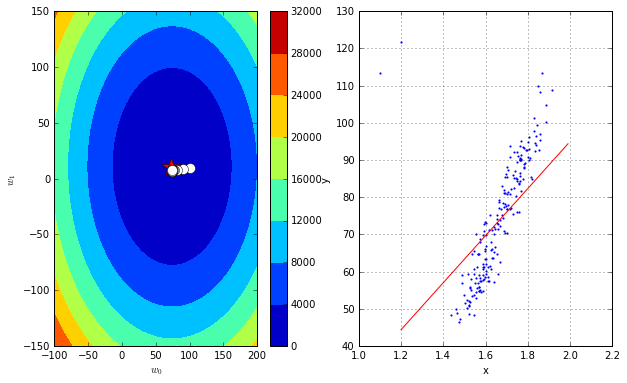

In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x_outlier, std_x_outlier, height_outlier, weight_outlier)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))